# 1.데이터불러오기

In [29]:
import re
import pandas as pd
import numpy as np
import json
#import bs4 iBeautiful Soup
# from nltk.corpus import Beautiful Soup
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
import konlp
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
#헤더추가 (title,content,time)
train =pd.read_csv('DATASET.csv',names=['title','content','time'])
train.head()
train.shape
train.dtypes

title      object
content    object
time       object
dtype: object

In [31]:
train.head()

,title,content,time
0,"'전주기접놀이, 인도네시아 토라자 페스티벌 초청 공연'",'하나인 인도네시아 토라자 인터내셔널 페스티벌에서 초청공연을 한다. 이를 위해 백정...,2019-07-20 16:40
1,"'한국 지능형교통시스템(ITS), 아세안 시장 진출 타진'","'또 말레이시아, 인도네시아 등 아세안 회원국의 ITS 추진 현황과 계획을 듣고 한...",2019-07-20 16:40
2,"''실트황제' 방탄소년단 지민 위엄…\숨만 쉬어도 실시간 트렌드 점령\"" 화제'""","'7위, 인도네시아 4위, 필리핀 5위 등 압도적 언급 양으로 그룹(BTS)과 함께...",2019-07-20 16:40
3,'인니 방영 만화 40% 한국산…오승현 애니 감독 '깃발 꽂아'','미국서 활동하다 인니 스카우트된 뒤 지난해 독립 회사 차려 성혜미 특파원 = 인도...,2019-07-20 16:41
4,"'팔아야 귀국, 멤버들 인도네시아 홈쇼핑 쇼 호스트 변신'",'오늘 방송되는 '팔아야 귀국 in 인도네시아'에서는 팔아야 귀국 멤버들이 인도네시...,2019-07-20 16:41


In [33]:
train.shape

(273, 3)

# 2.데이터전처리

In [32]:
 # 데이터개수
 print('학습 데이터의 개수: {}'.format(len(train)))

학습 데이터의 개수: 273


In [35]:
# title(제목) 컬럼 문자길이
train_title_len=train['title'].apply(len)
train_title_len.head()

0    30
1    32
2    45
3    36
4    32
Name: title, dtype: int64

In [36]:
# content(내용) 컬럼 문자길이
train_content_len=train['content'].apply(len)
train_content_len.head()

0    119
1    122
2    137
3    116
4    120
Name: content, dtype: int64

Text(0, 0.5, 'Number of review')

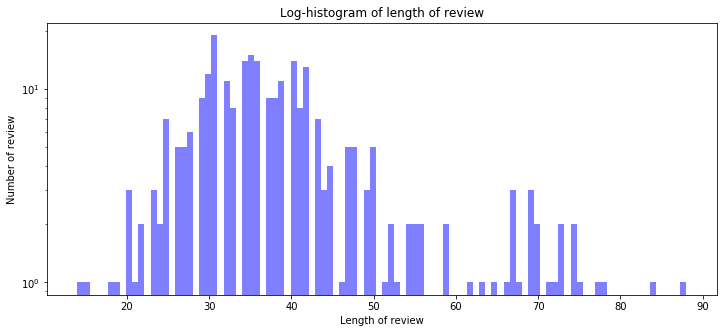

In [48]:
# title 문자길이 분포

#그래프에 대한 이미지 크기 선언
#figsize : (가로,세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))
#히스토그램 선언
# bins: 히스토그램 값에 대한 버킷 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color :그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_title_len, bins=100, alpha=0.5, color='b',label='word')
plt.yscale('log',nonposy='clip')
#그래프 제목
plt.title('Log-histogram of length of review')
#그래프 x축 라벨
plt.xlabel('Length of review')
#그래프 y축 라벨
plt.ylabel('Number of review')

In [50]:
# title 길이 통계값
print('제목 길이 최댓값: {}'.format(np.max(train_title_len)))
print('제목 길이 최솟값: {}'.format(np.min(train_title_len)))
print('제목 길이 평균값: {:.2f}'.format(np.mean(train_title_len)))
print('제목 길이 표준편차: {:.2f}'.format(np.std(train_title_len)))
print('제목 길이 중간값 {}'.format(np.median(train_title_len)))
print('제목 길이 제1사분위: {}'.format(np.percentile(train_title_len,25)))
print('제목 길이 제3사분위: {}'.format(np.percentile(train_title_len,75)))     
    
                    

제목 길이 최댓값: 88
제목 길이 최솟값: 14
제목 길이 평균값: 39.13
제목 길이 표준편차: 12.79
제목 길이 중간값 36.0
제목 길이 제1사분위: 31.0
제목 길이 제3사분위: 43.0


Text(0, 0.5, 'Number of review')

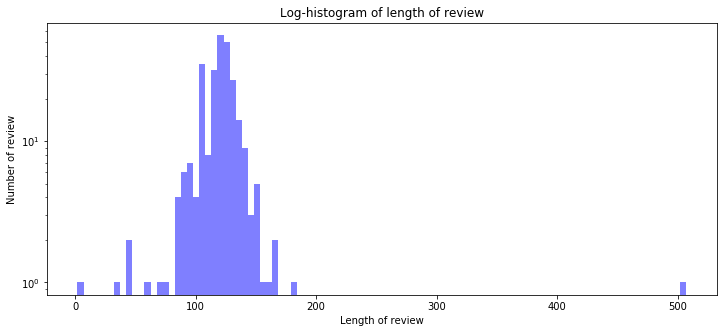

In [46]:
# content 문자길이 분포
# title 문자길이 분포

#그래프에 대한 이미지 크기 선언
#figsize : (가로,세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))
#히스토그램 선언
# bins: 히스토그램 값에 대한 버킷 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color :그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_content_len, bins=100, alpha=0.5, color='b',label='word')
plt.yscale('log',nonposy='clip')
#그래프 제목
plt.title('Log-histogram of length of review')
#그래프 x축 라벨
plt.xlabel('Length of review')
#그래프 y축 라벨
plt.ylabel('Number of review')

In [52]:
# content 길이 통계값
print('내용 길이 최댓값: {}'.format(np.max(train_content_len)))
print('내용 길이 최솟값: {}'.format(np.min(train_content_len)))
print('내용 길이 평균값: {:.2f}'.format(np.mean(train_content_len)))
print('내용 길이 표준편차: {:.2f}'.format(np.std(train_content_len)))
print('내용 길이 중간값 {}'.format(np.median(train_content_len)))
print('내용 길이 제1사분위: {}'.format(np.percentile(train_content_len,25)))
print('내용 길이 제3사분위: {}'.format(np.percentile(train_content_len,75)))     
    

내용 길이 최댓값: 507
내용 길이 최솟값: 2
내용 길이 평균값: 120.33
내용 길이 표준편차: 30.01
내용 길이 중간값 121.0
내용 길이 제1사분위: 111.0
내용 길이 제3사분위: 128.0


(-0.5, 799.5, 599.5, -0.5)

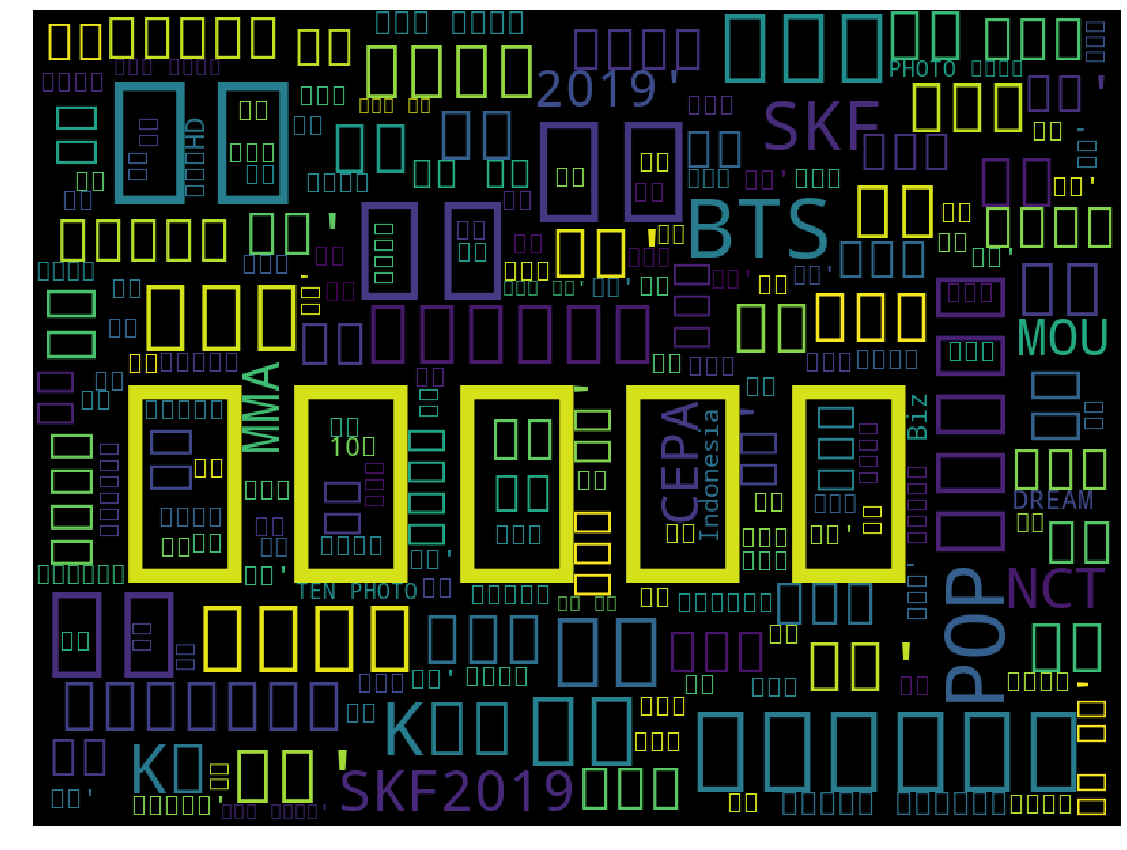

In [54]:
# title(제목) 많이 사용된 단어
from wordcloud import WordCloud
cloud=WordCloud(width=800,height=600).generate(" ".join(train['title']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

# 3.데이터정제

In [1]:
# HTML 및 문장부호 제거


In [2]:
# 불용어제거

In [3]:
# 단어최대길이설정

In [4]:
# 벡터표상화

# 4.word2vec 벡터화